## 정보 이론

- 정보 이론이란 추상적인 '정보'라는 개념을 정량화하고 정보의 저장과 통신을 연구하는 분야이다.

### Information content

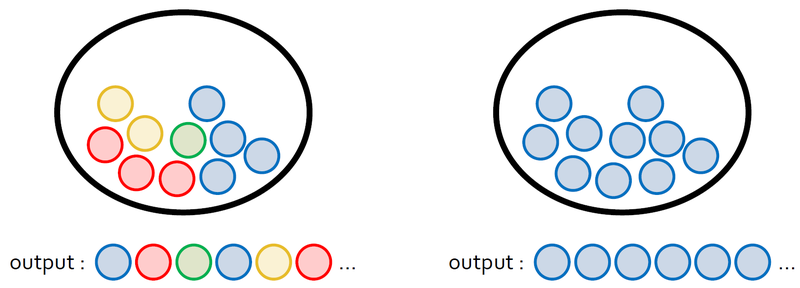

양쪽 주머니 모두 공을 하나씩 꺼내서 색깔을 보고 다시 넣는 과정을 반복한다 할 때, 오른쪽 주머니는 파란색 공만 관찰될 것이므로 별다른 정보가 없을 것이다.   
   

정보를 정량적으로 표현하기 위해 필요한 세 가지 조건
1. 일어날 가능성이 높은 사건은 정보량이 낮고, 반드시 일어나는 사건에는 정보가 없는 것이나 마찬가지이다.
2. 일어날 가능성이 낮은 사건은 정보량이 높다.
3. 두 개의 독립적인 사건이 있을 때, 전체 정보량은 각각의 정보량을 더한 것과 같습니다.
   
   
사건 x가 일어날 확률을 P(X=x)라고 할 때, 사건의 정보량 I(x)는   
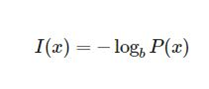

In [1]:
import numpy as np
import math
import random

# 주머니 속에 들어있는 공의 개수
total = 1000

#---------------#

count = 1   # 실험이 끝날 때까지 꺼낸 공의 개수

# 1부터 total까지의 정수 중에서 하나를 뽑고 total과 같으면 실험 종료
# total=1000인 경우 1~999: blue / 1000: red
while True:
    sample = random.randrange(1,total+1)
    if sample == total:
        break
    count += 1

print('number of blue samples: '+str(count-1))
print('information content: '+str(-math.log(1/count)))

number of blue samples: 6
information content: 1.9459101490553135


### Entropy
정보량은 한 가지 사건에 대한 값이다. 예를 들면 주사위를 던졌을 때 1이 나오는 사건이 있다. 하지만 여러 가지 경우의 수가 존재하는 실험의 정보량은 어떻게 구할까? 직관적으로 확률 변수가 가지는 모든 경우의 수에 대해 정보량을 구하고 평균을 내면 확률 변수의 평균적인 정보량을 구할 수 있을 것이다. 특정 확률분포를 따르는 사건들의 정보량 기댓값을 엔트로피라고 한다.

- 이산 확률 변수   
엔트로피는 각각의 경우의 수가 가지는 정보량에 확률을 곱한 후, 그 값을 모두 더한 값이다.
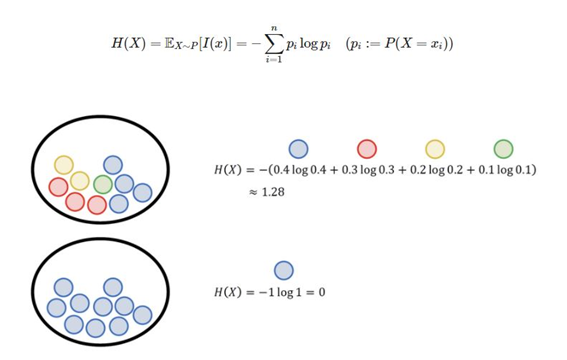
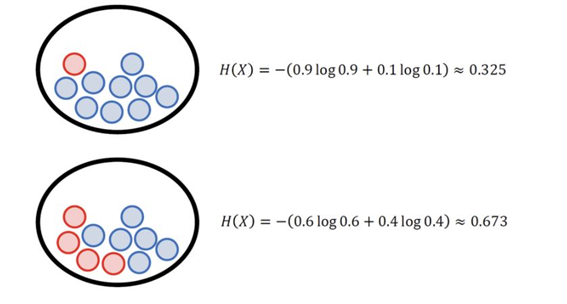

결과값을 보면 사건들의 확률이 균등할수록 엔트로피값은 증가한다는 것을 볼 수 있다. 즉, 균등 분포 엔트로피 값이 최대가 된다.

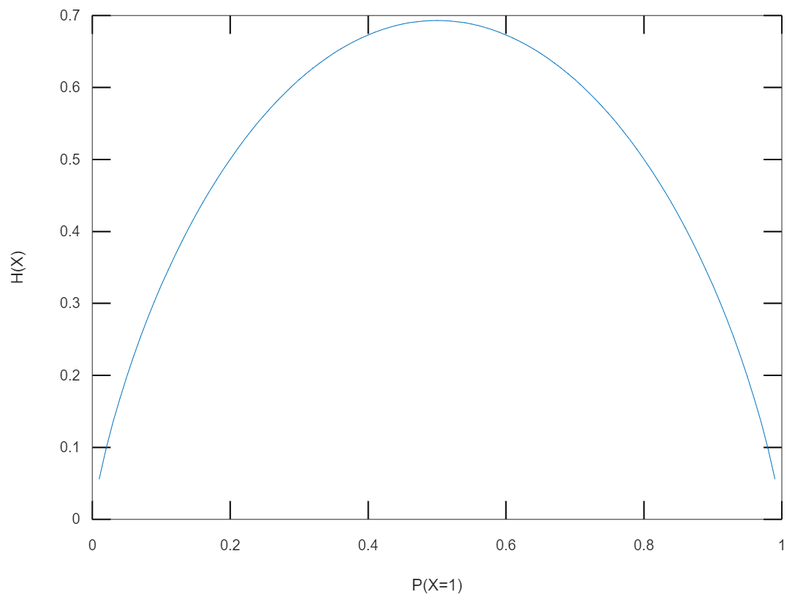

- 연속 확률 변수   
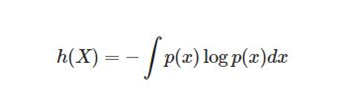

### Kullback Leibler Divergence

머신러닝의 목표는 새로운 입력 데이터가 들어와도 예측이 잘 되도록 모델의 확률 분포를 데이터의 실제 확률 분포에 가깝게 만드는 것이다. 즉 두 확률 분포의 차이를 나타내는 지표가 필요한데, 대표적인 예가 클백-라이블러 발산이다.   
   
   
데이터가 따르는 실제 확률 분포를 P(x), 모델이 나타내는 확률 분포를 Q(x)라고 하자.두 확률 분포의 KL divergence는 P(x)를 기준으로 계산된 Q(x)의 평균 정보량과, P(x)를 기준으로 계산된 P(x)의 평균 정보량의 차이로 정의할 수 있다. 실젝 확률 분포 P(x) 대신 근사적인 분포 Q(x)를 사용했을 때 발생하는 엔트로피의 변화량을 나타내는 값이다.

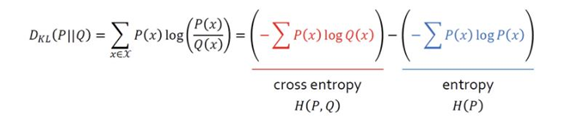

P(x)는 데이터의 실제 분포이므로 우리가 바꿀 수 없는 값이다. 즉, 파란색 부분은 우리가 줄일 수 없다. 우리가 바꿀 수 있는 부분은 Q(x)이기 때문에 KL divergence를 최소화하는 문제는 곧 빨간색 부분을 최소화하는 문제이다. 이 부분은 P(x)를 기준으로 계산한 Q(x)의 엔트로피, 즉 P(x)에 대한 Q(x)의 교차 엔트로피 이다.

### Cross Entropy Loss

결국 모델의 확률분포와 실제 데이터의 확률 분포 차이를 나타내는 함수는 손실 함수이다. 

### Decision tree 와 Entropy

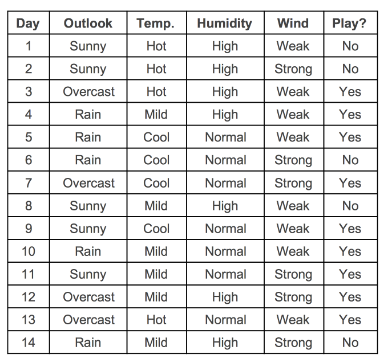

Decision tree는 가지고 있는 데이터에서 어떤 기준으로 전체 데이터를 나눴을 때 나누기 전보다 엔트로피가 감소하는지를 띠ㅏ져서, 엔트로피가 감소하면 그만큼 모델 내부에 정보 이득을 얻었다고 본다. (Information Gain = IG)

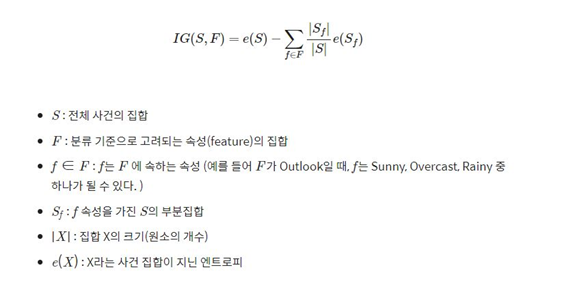

e(s)를 먼저 구해보면 전체 14가지 경우 중 play 하는 경우 9번, 하지 않는 경우 5번이다.

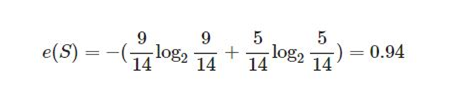

이제 F가 Outlook일 때 엔트로피를 각각 구한다.

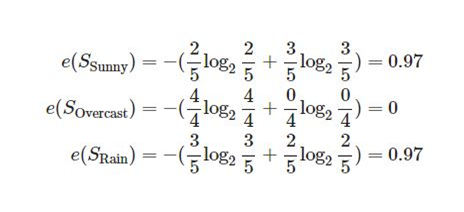

이 때의 정보 이득은 다음과 같다.

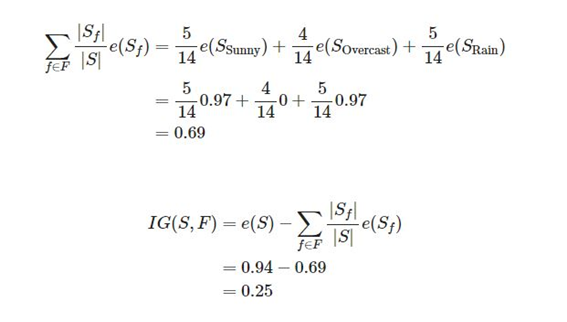

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [2]:
import os
csv_path = os.getenv('HOME')+'/aiffel/information_theory/diabetes.csv'

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
df = pd.read_csv(csv_path, header=0, names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# 데이터셋 준비
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = df[feature_cols] # Features
y = df.label # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [4]:
# Decision Tree  모델 학습
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6883116883116883


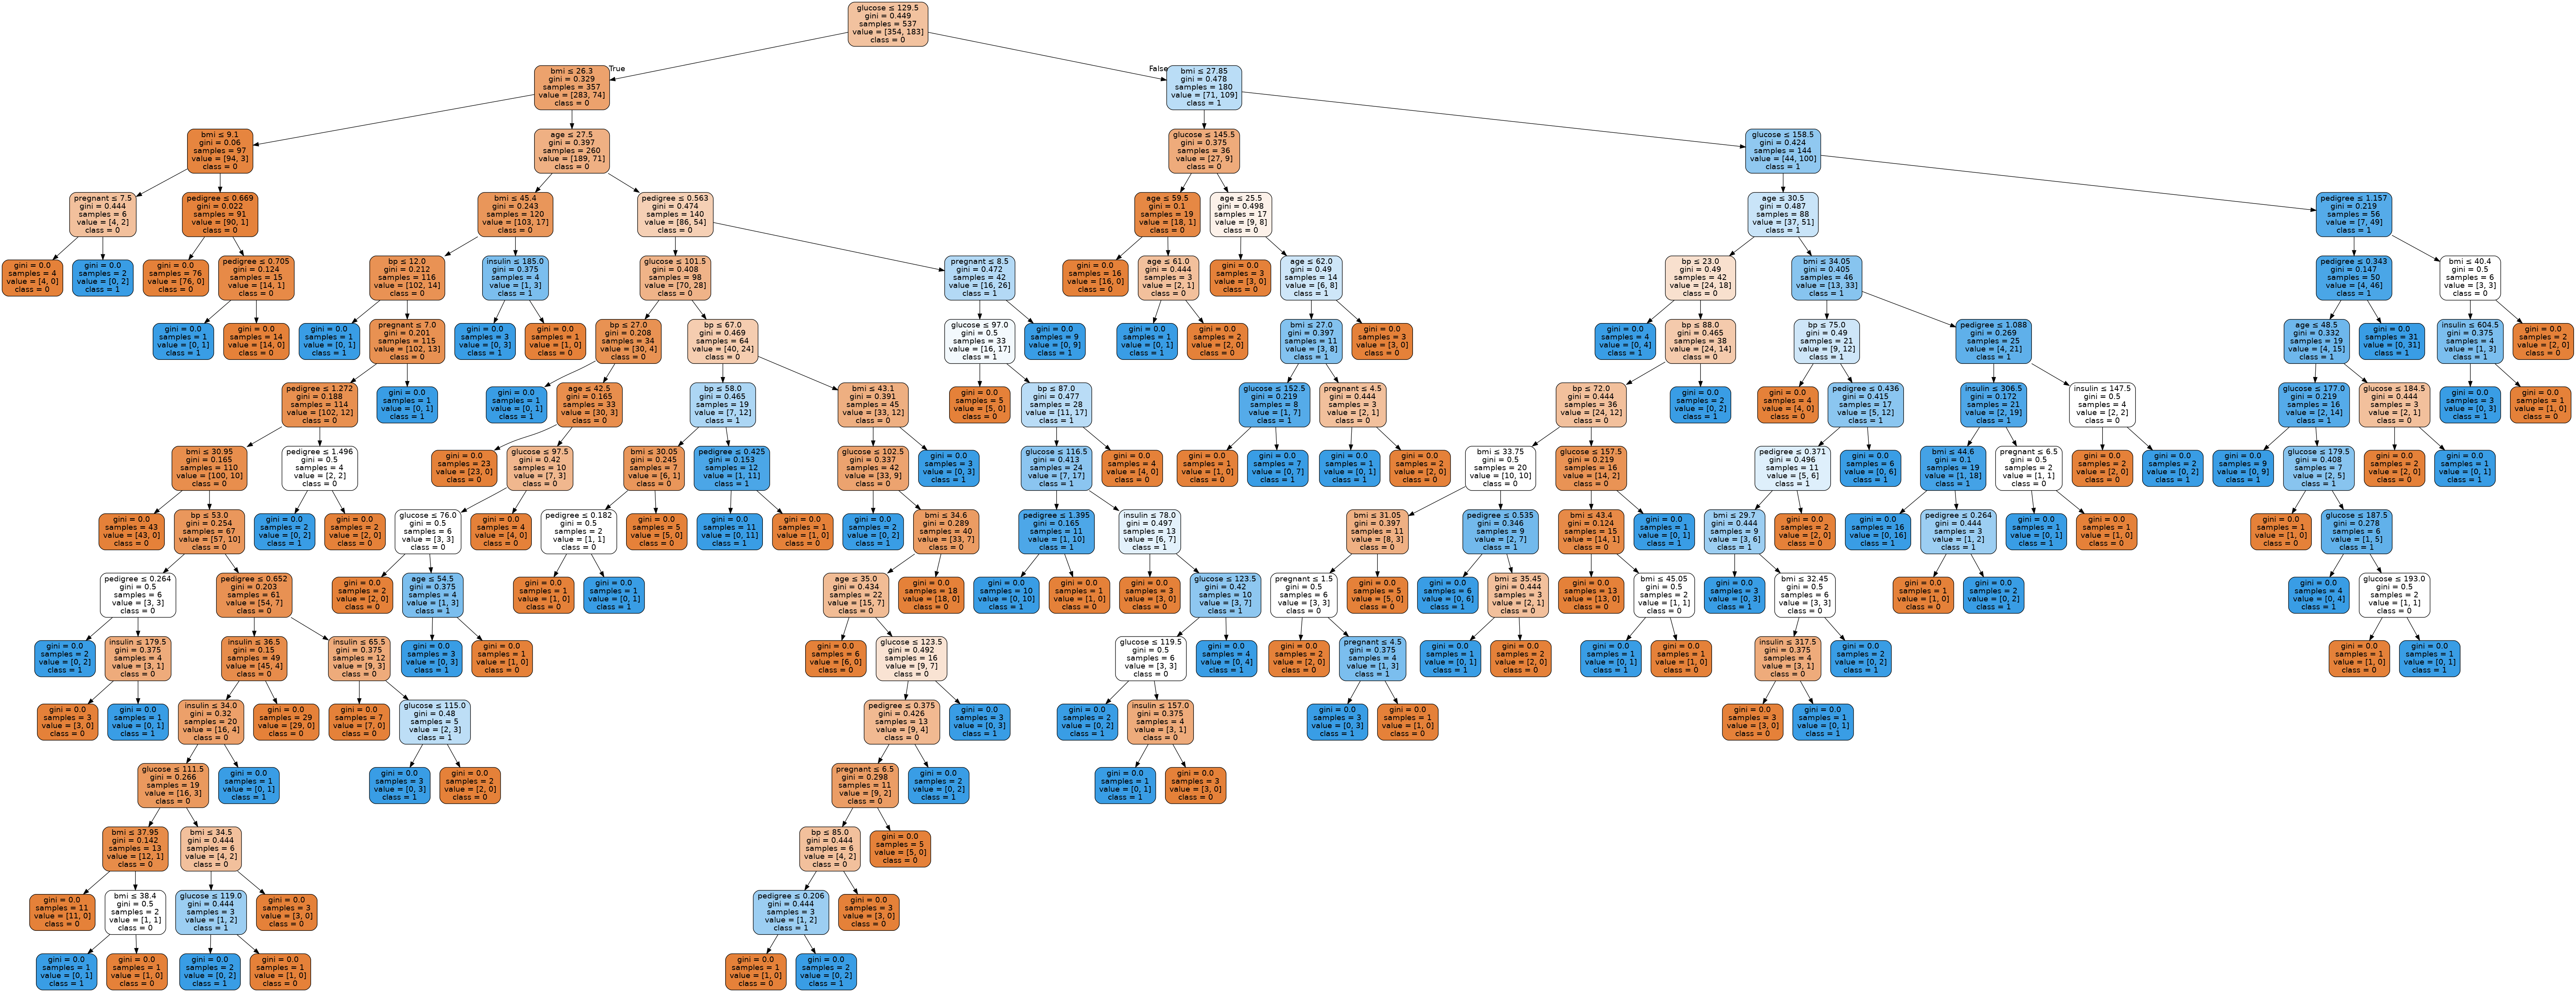

In [5]:
# 시각화

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names=feature_cols, 
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes1.png')
Image(graph.create_png(), retina=True)

In [6]:
# 정보 이득이 되지 않고 남은 Impurity  총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test,y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.1550418448388093
0.14933968140533083


현재 decision tree는 정보 이득을 최대화 할 수 있는 지점까지 극한적으로 많은 분류 기준을 적용한 경우이다. 이번에는 decision tree를 3depth까지만 발전시켜서 비교해 보자.

In [7]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


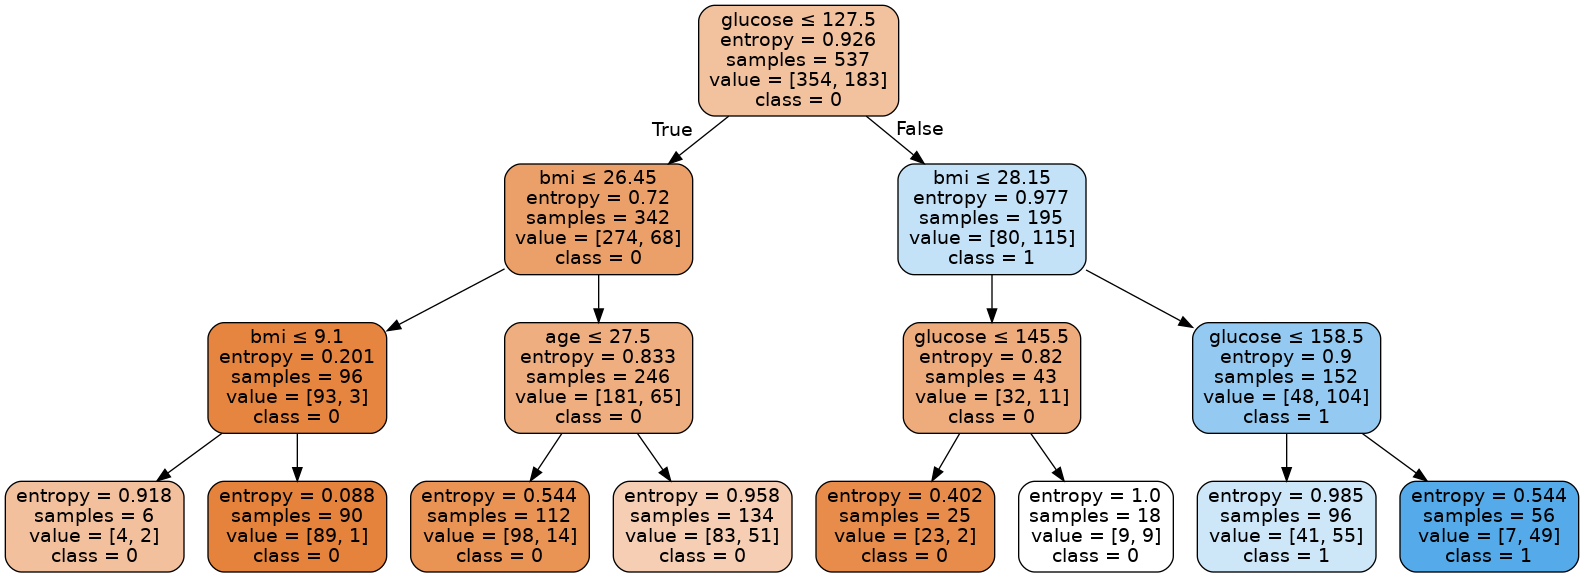

In [8]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png(), retina=True)

In [9]:
# 정보이득이 되지 않고 남은 Impurity  총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test,y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.7474881472739515
0.6878691771636323


- 오히려 정확도가 오른 것을 확인할 수 있다. 그 이유는 decision tree의 분류기준이 임의로 정해진 것이기 때문이다. 무한정 기준을 쪼개서 엔트로피를 떨어뜨릴 수 있지만, 그것은 overfitting이 될 것이다.